<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기 및 확인

In [75]:
import pandas as pd
titanic = pd.read_table('train.csv',sep = ',')
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


## 결측치 삭제

In [76]:
print(titanic.isnull().sum())
titanic = titanic.dropna()
print(titanic.isnull().sum())

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Survived         0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Survived       0
dtype: int64


## 'Survived' 변수의 상관관계 분석

In [77]:
corr = titanic.corr(method = 'pearson')
corr = corr[corr.Survived != 1]
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035349,-0.024575,0.036847,-0.082398,-0.011617,0.009592,0.029340
Pclass,-0.035349,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.359653
Sex,-0.024575,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994,0.538826
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.082398,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329,-0.017358
Parch,-0.011617,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119,0.093317
Fare,0.009592,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000,0.268189


## 시각화 matplotlib

<Axes: >

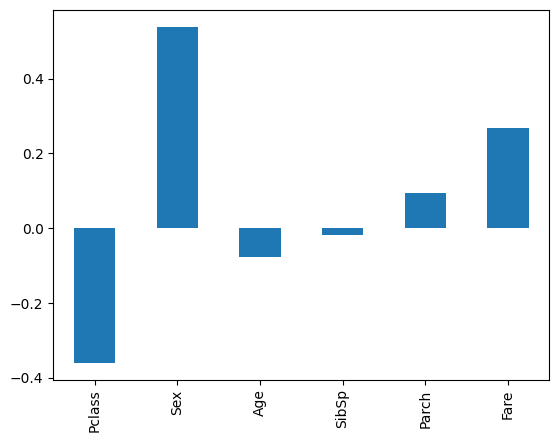

In [78]:
import matplotlib.pyplot as plt
corr = corr.drop(['PassengerId'], axis = 'rows')
corr['Survived'].plot.bar()

## 타이타닉 'Age' 칼럼 분석


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
titanic = pd.read_table('train.csv',sep = ',')
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [80]:
titanic = titanic.dropna()
print(titanic.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Survived       0
dtype: int64


In [81]:
#'age' 칼럼에 주목
titanic.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514,0.406162
std,259.119524,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.491460
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000


<Axes: >

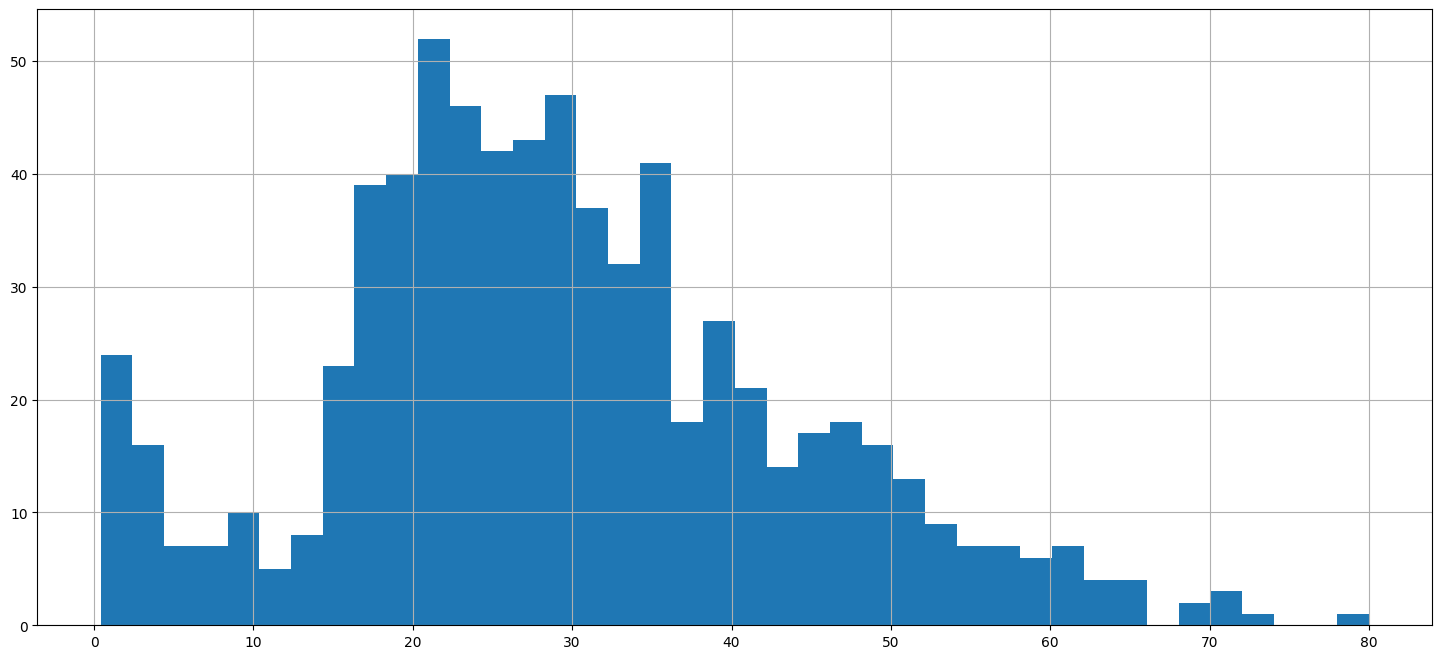

In [87]:
#승객의 나이에 대한 분포도

titanic['Age'].hist(bins=40,figsize = (18,8),grid=True)

In [89]:
#나이별 구분 및 각 나이별 생존율 확인 하기
titanic['Age_cat'] = pd.cut(titanic['Age'],bins=[0,3,7,15,30,60,100],include_lowest=True,labels=['baby','children','teenage','young','adult','old'])

#연령대를 기준으로 평균 값을 구해 볼수 있어요!
titanic.groupby('Age_cat').mean()

<ipython-input-89-b313f4bd5373>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Age_cat').mean()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Age_cat,,,,,,,,
baby,396.700000,2.533333,0.400000,1.672333,1.733333,1.366667,33.364307,0.666667
children,466.700000,2.650000,0.600000,4.950000,1.750000,1.350000,27.905830,0.700000
teenage,442.060606,2.696970,0.575758,11.500000,1.727273,1.121212,35.217430,0.454545
young,435.058282,2.426380,0.352761,23.262270,0.355828,0.263804,28.015413,0.358896
adult,470.388693,1.954064,0.353357,41.132509,0.363958,0.392226,42.429225,0.420495
old,432.545455,1.590909,0.136364,66.022727,0.136364,0.272727,41.371214,0.227273


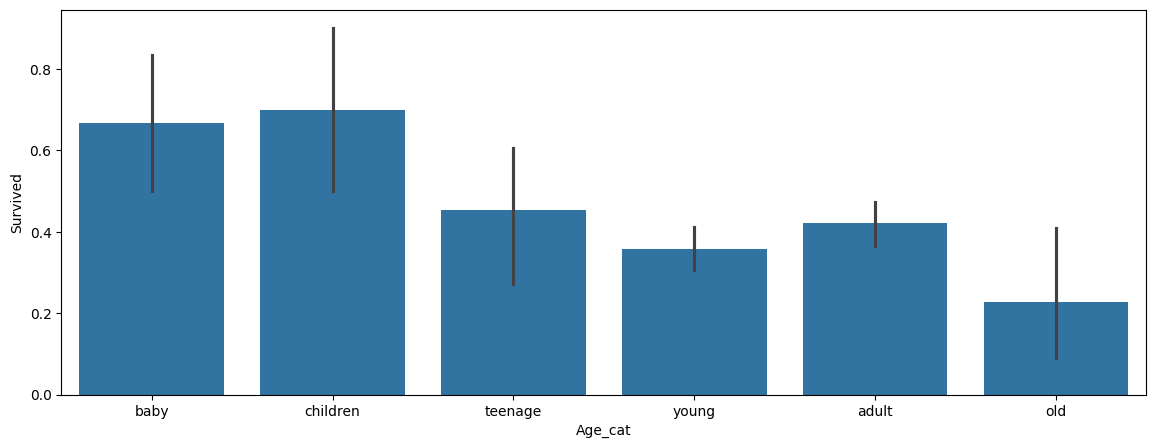

In [92]:
############# baby와 children의 높은 생존율을 발견할 수 있다 ######################
#그래프 크기 설정
plt.figure(figsize=(14,5))

# 바 그래프 그리기 (x축 = Age_cat, y축 = Survived)
sns.barplot(x='Age_cat',y='Survived',data=titanic)

# 그래프 나타내기
plt.show()